In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import zipimport
importer = zipimport.zipimporter("nltk.zip")
importer.load_module("nltk")

import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk import download

download("stopwords") #downloading predmade library of stopwords

from sklearn.feature_extraction.text import CountVectorizer


[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
wine_data = pd.read_csv("./winemagdata130kv2.csv", quoting=2)
wine_data = wine_data [["description", "points"]]
wine_data = wine_data.sample(1000, random_state = 1693).reset_index(drop=True)
print(wine_data.shape)

(1000, 2)


In [3]:
wine_descriptions = re.sub('[^a-zA-Z0-9 ]','', wine_data["description"][0]) #space between 9 and  "]"
#go through text, and if it is anything from lowercase a- z
#or uppercase A-Z, or 0-9 don't replace. Anything else, sub with the close space

wine_descriptions
wine_descriptions = wine_descriptions.lower()

#stop word = word we want to strip from text cos it doesn't mean much for us
wine_descriptions = wine_descriptions.split()
stopwords.words("english")

wine_descriptions = [word for word in wine_descriptions if not word in set(stopwords.words("english"))]

#taking the stem of each word
stemmer = PorterStemmer()
wine_descriptions = [stemmer.stem(word) for word in wine_descriptions]
wine_descriptions

wine_descriptions = " ".join(wine_descriptions)
wine_descriptions

'atauta singlevineyard wine sensat 2011 vintag la mala arguabl overtli oaki modern style graini resini barreldriven aroma come control burn heat tannic firm cement ampl oak resin creat creami feel resini fulli spice blackfruit flavor end pepper wood grain burnt toast oaki note drink 20182031'

In [4]:
%%time
wine_data = pd.read_csv("./winemagdata130kv2.csv", quoting=2)
wine_data = wine_data [["description", "points"]]
wine_data = wine_data.sample(1000, random_state = 1693).reset_index(drop=True)
corpus = []

for i in range(len(wine_data)):
    wine_descriptions = re.sub('[^a-zA-Z0-9 ]','', wine_data["description"][i])
    wine_descriptions = wine_descriptions.lower()
    wine_descriptions = wine_descriptions.split()
    wine_descriptions = [word for word in wine_descriptions if not word in set(stopwords.words("english"))]
    stemmer = PorterStemmer()
    wine_descriptions = [stemmer.stem(word) for word in wine_descriptions]
    wine_descriptions = " ".join(wine_descriptions)
    corpus.append(wine_descriptions)
    
countVec = CountVectorizer()
X_raw = countVec.fit_transform(corpus)
X = X_raw.toarray()

y = wine_data["points"]
y = y.where(y>90, other = 0).where(y <= 90, other = 1).values #where helps us write conditional statement in panda

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.25, random_state = 1693)
#from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
#from sklearn.naive_bayes import GaussianNB
#classifier = GaussianNB()
classifier = LogisticRegression(random_state = 1693)
#classifier = DecisionTreeClassifier(random_state = 1693)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred

CPU times: user 6.49 s, sys: 372 ms, total: 6.86 s
Wall time: 6.87 s


In [5]:
from sklearn.metrics import confusion_matrix
confMat =confusion_matrix(y_test, y_pred)
def print_cm(cm, labels, hide_zeroes=False, hide_diagonal=False, hide_threshold=None):
    """pretty print for confusion matrixes"""
    columnwidth = max([len(x) for x in labels] + [5])  # 5 is value length
    empty_cell = " " * columnwidth
    # Print header
    print("    " + empty_cell, end=" ")
    for label in labels:
        print("%{0}s".format(columnwidth) % label, end=" ")
    print()
    # Print rows
    for i, label1 in enumerate(labels):
        print("    %{0}s".format(columnwidth) % label1, end=" ")
        for j in range(len(labels)):
            cell = "%{0}.1f".format(columnwidth) % cm[i, j]
            if hide_zeroes:
                cell = cell if float(cm[i, j]) != 0 else empty_cell
            if hide_diagonal:
                cell = cell if i != j else empty_cell
            if hide_threshold:
                cell = cell if cm[i, j] > hide_threshold else empty_cell
            print(cell, end=" ")
        print()

In [6]:
print_cm(confMat, ["Bad Wine", "Good Wine"])

               Bad Wine Good Wine 
     Bad Wine     165.0      12.0 
    Good Wine      41.0      32.0 


In [7]:
X
print(pd.DataFrame(X_raw.A, columns=countVec.get_feature_names()).transpose()) #making it look pretty or more readable

              0    1    2    3    4    5    6    7    8    9   ...   990  991  \
04              0    0    0    0    0    0    0    0    0    0 ...     0    0   
06              0    0    0    0    0    0    0    0    0    0 ...     0    0   
07              0    0    0    0    0    0    0    0    0    0 ...     0    0   
08              0    0    0    0    0    0    0    0    0    0 ...     0    0   
10              0    0    0    0    0    0    0    0    0    0 ...     0    0   
100             0    0    0    0    0    0    0    0    0    0 ...     0    0   
1015            0    0    0    0    0    0    0    0    0    0 ...     0    0   
11              0    0    0    0    0    0    0    0    0    0 ...     0    0   
12              0    0    0    0    0    0    0    0    0    1 ...     0    0   
1200feet        0    0    0    0    0    0    0    0    0    0 ...     0    0   
12th            0    0    0    0    0    0    0    0    0    0 ...     0    0   
12thcenturi     0    0    0 

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


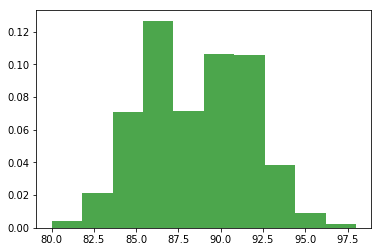

In [8]:
n, bins, patches = plt.hist(wine_data["points"].values, 10, normed=1, facecolor="green", alpha = 0.7)
plt.show()